### Visualizing the Data Set

In [7]:
# Importing relevant packages
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
filepath = "../Sentiment-Analysis-Movie-Recommendations/Code/movie-reviews-vectorized-data.csv"
df = pd.read_csv(filepath) # reading in data

df.head() # diplaying first 5 rows

,Unnamed: 0,file_ID,raw_text,Good,ability,able,absolute,absolutely,accent,accept,...,yeah,year,years,yes,york,young,younger,zero,zombie,zombies
0,0,neg/1821_4.txt,Working with one of the best Shakespeare sourc...,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,neg/10402_1.txt,"Well...tremors I, the original started off in ...",False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,neg/1062_4.txt,Ouch! This one was a bit painful to sit throug...,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,neg/9056_1.txt,"I've seen some crappy movies in my life, but t...",False,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,neg/5392_3.txt,"""Carriers"" follows the exploits of two guys an...",False,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [4]:
# Removing the Unnamed: 0 column, file_ID, and raw_text columns
# Renaming the "Good" column to "is_good"

df = df.drop(["Unnamed: 0", "file_ID", "raw_text"], axis=1)
df = df.rename(columns={"Good": "is_good"})
df.head() # checking data

,is_good,ability,able,absolute,absolutely,accent,accept,accident,accidentally,according,...,yeah,year,years,yes,york,young,younger,zero,zombie,zombies
0,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,False,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
# new data frame
words = pd.DataFrame()

# dropping the target column
temp = df.drop("is_good", axis=1)
# including a list of words
words["vocab"] = temp.columns

words.head()

,vocab
0,ability
1,able
2,absolute
3,absolutely
4,accent


In [8]:
# number of words (frequency)
num_words = np.array([])

for word in df.columns: 
    if word == "is_good":
        continue
    else:
        num_words = np.append(num_words, np.sum(df[word]))

In [9]:
# Adding frequency of words to data frame
words['frequency'] = num_words
# sorting words - most frequent to least frequent
words = words.sort_values(by=['frequency'], ascending=False)
words.head()

,vocab,frequency
826,like,1578.0
766,just,1442.0
613,good,1128.0
1363,story,984.0
1453,time,954.0


In [10]:
# Top 20 most frequent words
freq = words[:20]
freq

,vocab,frequency
826,like,1578.0
766,just,1442.0
613,good,1128.0
1363,story,984.0
1453,time,954.0
1152,really,925.0
623,great,784.0
106,bad,737.0
1033,people,735.0
875,make,701.0


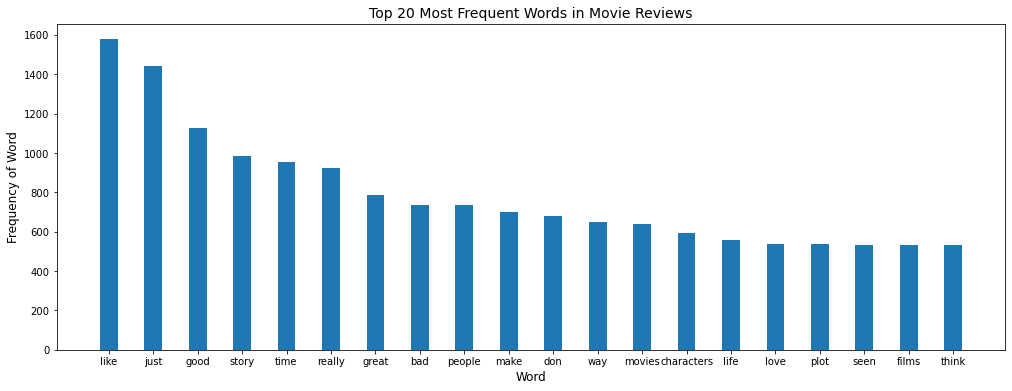

In [12]:
plt.figure(figsize=(17, 6))
plt.bar(freq["vocab"], freq["frequency"], width=0.4)
plt.title("Top 20 Most Frequent Words in Movie Reviews", fontsize=14)
plt.ylabel("Frequency of Word", fontsize=12)
plt.xlabel("Word", fontsize=12)
plt.savefig('viz-of-dataset.png')